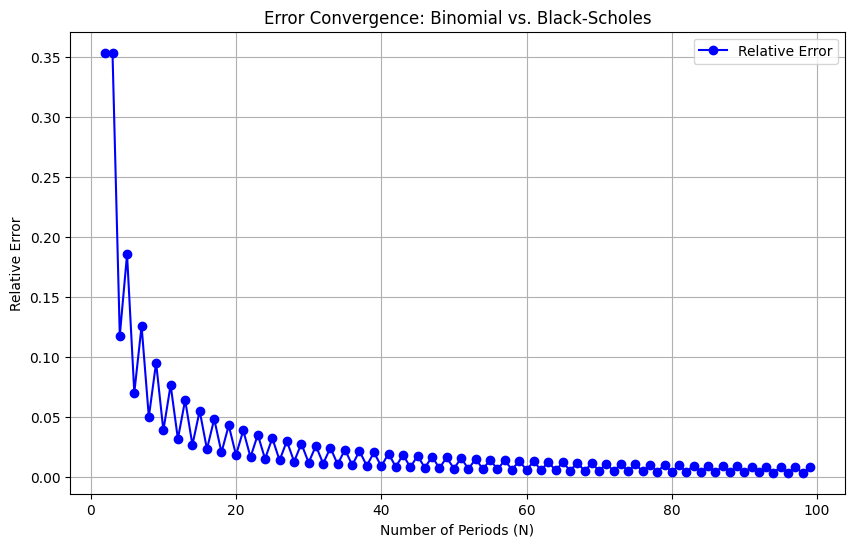

In [37]:
#increasing N in a linear way:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import norm

def multiperiod_pricing(N,r_f,u,d,q_u,q_d,k,s0):
    mult_price=0
    for i in range (N+1):
        if (s0*u**i*d**(N-i)>k):
            mult_price=mult_price+(s0*u**i*d**(N-i)-k)*q_u**i*q_d**(N-i)*comb(N, i, exact=True)
    return mult_price

def BS_call_price(s0,k,T,sigma,r):
    d_1=1/(sigma*np.sqrt(T))*(np.log(s0/k)+(r+sigma**2/2)*T)
    d_2=d_1-sigma*np.sqrt(T)
    correct_price= s0*norm.cdf(d_1)-np.exp(-r*T)*k*norm.cdf(d_2)
    return correct_price


sigma=0.2
T=1
r=0.02
N_tot=100
N_values=range(2,N_tot)
K=100
S_0=100

error=[]
for N in N_values:
    r_f=np.exp(0.02/(N-1))
    u=np.exp(sigma*np.sqrt(1/(N-1)))
    d=1/u
    q_u=(r_f-d)/(u-d)
    q_d=1-q_u
    binomial_price=np.exp(-r*T)*multiperiod_pricing(N,r_f,u,d,q_u,q_d,K,S_0)
    BS_price=BS_call_price(S_0,K,T,sigma,r)
    error.append((binomial_price-BS_price)/BS_price)

#setting the plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, error, marker='o', linestyle='-', color='b', label='Relative Error')
plt.xlabel('Number of Periods (N)')
plt.ylabel('Relative Error')
plt.title('Error Convergence: Binomial vs. Black-Scholes')
plt.grid(True)
plt.legend()
plt.show()


    

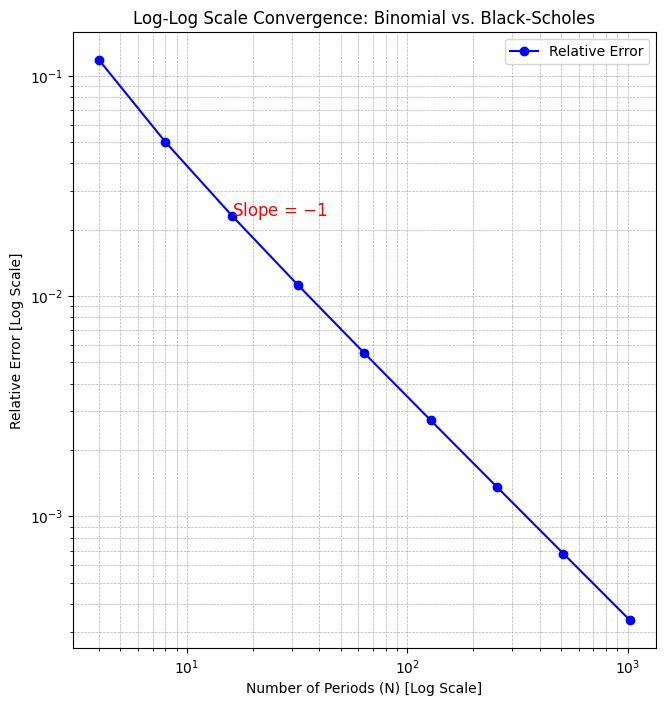

In [34]:
#logarithmic scale convergence pattern
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import norm

def multiperiod_pricing(N,r_f,u,d,q_u,q_d,k,s0):
    mult_price=0
    for i in range (N+1):
        if (s0*u**i*d**(N-i)>k):
            mult_price=mult_price+(s0*u**i*d**(N-i)-k)*q_u**i*q_d**(N-i)*comb(N, i, exact=True)
    return mult_price

def BS_call_price(s0,k,T,sigma,r):
    d_1=1/(sigma*np.sqrt(T))*(np.log(s0/k)+(r+sigma**2/2)*T)
    d_2=d_1-sigma*np.sqrt(T)
    correct_price= s0*norm.cdf(d_1)-np.exp(-r*T)*k*norm.cdf(d_2)
    return correct_price
    

sigma=0.2
T=1
r=0.02
N_tot=100
N_values=[]
for i in range (2,11):
    N_values.append(2**i)
K=100
S_0=100
error=[]
for N in N_values:
    r_f=np.exp(0.02/(N-1))
    u=np.exp(sigma*np.sqrt(1/(N-1)))
    d=1/u
    q_u=(r_f-d)/(u-d)

    q_d=1-q_u
    binomial_price=np.exp(-r*T)*multiperiod_pricing(N,r_f,u,d,q_u,q_d,K,S_0)
    BS_price=BS_call_price(S_0,K,T,sigma,r)
    error.append(np.abs(binomial_price-BS_price)/BS_price)

#setting the plot to visualize the convergence behaviour: LOG(error) \sim -LOG(N)
plt.figure(figsize=(8, 8))  # Ensure square figure dimensions
plt.loglog(N_values, error, marker='o', linestyle='-', color='b', label='Relative Error')

# Set axis labels and title
plt.xlabel('Number of Periods (N) [Log Scale]')
plt.ylabel('Relative Error [Log Scale]')
plt.title('Log-Log Scale Convergence: Binomial vs. Black-Scholes')

# Set equal scaling for both axes
plt.gca().set_aspect('equal', adjustable='box')

# Add gridlines for clarity
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Annotate the slope
plt.text(N_values[2], error[2], r'Slope = $-1$', fontsize=12, color='red')

# Add legend and show plot
plt.legend()
plt.show()
